In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, insert
import sqlalchemy as sal

%matplotlib inline

### Import from SQL 

In [28]:
# establish connection to the database
engine = sal.create_engine('sqlite:///winewebscraping.db')
# storing tables from database into dataframe
master = pd.read_sql('SELECT * FROM master', engine)
ratings = pd.read_sql('SELECT * FROM ratings', engine)
varietals = pd.read_sql('SELECT * FROM varietals', engine)

In [29]:
master.head()

,product_name,price,varietal,rating,rating_count,appellation,region,year
0,Dom Perignon Vintage with Gift Box,199,Vintage Sparkling Wine,4.5,42.0,['Champagne'],France,2010
1,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,4.3,62.0,['Napa Valley'],California,2017
2,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,4.6,108.0,['Napa Valley'],California,2016
3,Quintessa,199,Cabernet Sauvignon,4.7,73.0,[' Napa Valley'],California,2016
4,Joseph Phelps Insignia,300,Bordeaux Red Blends,4.6,81.0,['Napa Valley'],California,2016


In [30]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count    float64
appellation      object
region           object
year              int64
dtype: object

In [31]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count    float64
appellation      object
region           object
year              int64
dtype: object

In [32]:
#set the base color for the charts
green = sb.color_palette("hls", 8)[3]
purple = sb.color_palette("hls", 8)[6]
yellow = sb.color_palette("hls", 8)[1]

### Price exploration 

Where are the most expensive wines from? Conversely the cheapest wines?

In [33]:
low = master['price'].min()
high = master['price'].max()
# print('The cheapest wine was priced at {}, and the most expensive wine was priced at {}').format(low, high)

In [34]:
master['price_cat'] = pd.cut(x = master['price'], bins = [ 0, 100, 250, 500, 1000, 18000], labels = ['$0-$99','$100-$249', '$250-$499','$500-$999','$1000+'], right=False) 

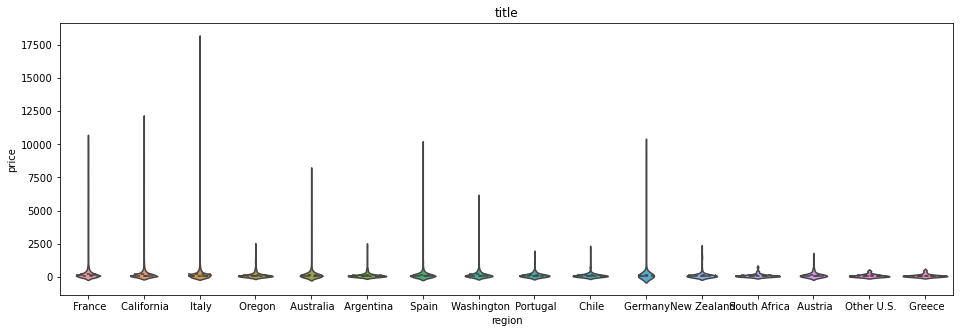

In [49]:
# Violin Plot
plt.figure(figsize = [16, 5])
plt.title('title');
sb.set_palette('husl', 9)
sb.violinplot(data=master, x='region', y='price', inner = 'quartile', );

### Region Exploration 

What are the top producting regions for highest rated wines?

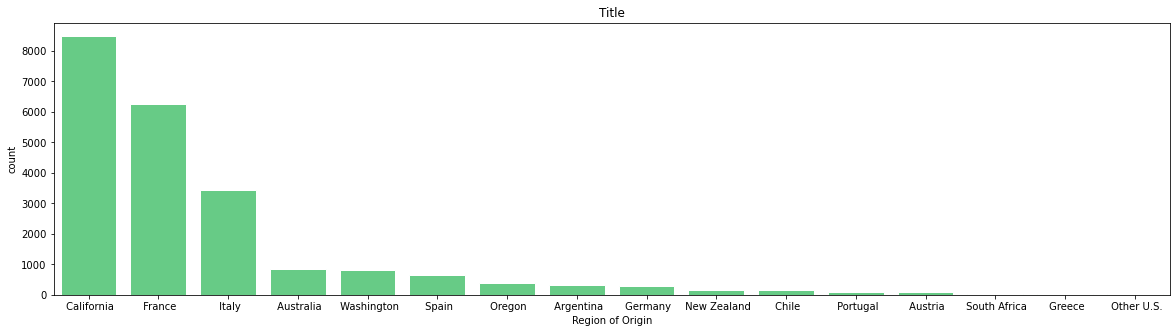

In [65]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='region', color=green, edgecolor='white', order = master['region'].value_counts().index).set( xlabel = "Region of Origin");

### Appellation Exploration

Which appelation tend to get he highest ratings? Conversly, which appellation have low ratings?

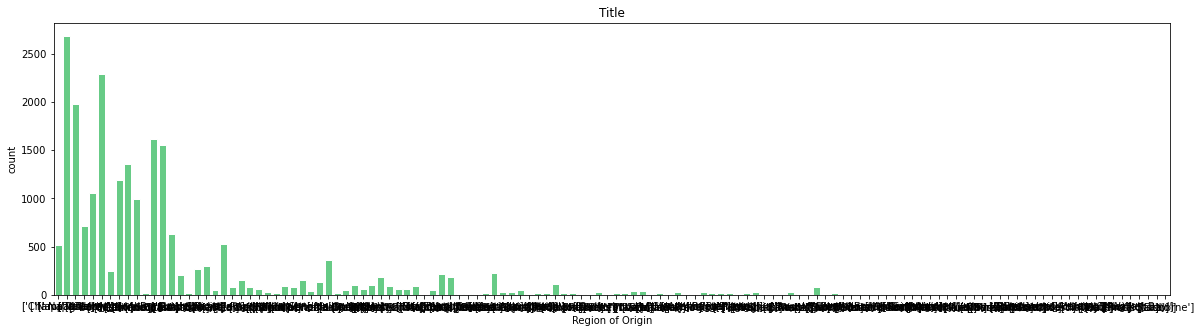

In [21]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='appellation', color=green, edgecolor='white').set( xlabel = "Region of Origin");

### Varietals Exploration 

Which varietals tend to get the highest ratings? Conversly, which varietals have low ratings?